In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

## Reconstruction Function

In [2]:
def reconstructPhase(sv, tau, n):
    '''
    reconstructPhase()
        samples state vector 'sv' at delay tau, with dimension n
    '''
    state = []
    for _ in range(n): state.append([])
    
    for i in range(0, len(sv)-(n*tau), tau):
        for dim in range(n):
            state[dim].append(sv[i+(dim*tau)])
            
    return state

## Forced, Damped, Harmonic Oscillator

We're going to treat our forced damped oscillator as an angular system (such as a pendulum) rather than linear displacement. 

We can adopt Taylor's notation, and write the equation of motion as

$$
\ddot{\phi} + 2\beta\dot{\phi} + \omega_0^2 sin \phi = \gamma \omega_0^2 cos(\omega t)
$$

We can linearize this by defining:
$$
x_1 = \phi \\
x_2 = \dot\phi \\
x_3 = t
$$
then define out system of equations as 
$$
\begin{cases} 
      \dot{x}_1 = \dot{\phi} \\
      \dot{x}_2 = \ddot{\phi} = \gamma \omega_0^2 cos(\omega x_3) - 2\beta\dot{\phi} - \omega_0^2sin(x_1) \\
      \dot{x}_3 = 1
   \end{cases}
$$

In [26]:
# define parameters
w0 = 1.5
B = 0.375
w = 1
# gamma >= 1.1 leads to chaos
gamma = 1.1

def dx1(x1,x2,x3):
    return x2
def dx2(x1,x2,x3):
    return (gamma * w0**2)*np.cos(w*x3) - 2*B*x2 - w0**2 * np.sin(x1)
def dx3(x1,x2,x3):
    return 1
def derivatives(t,X):
    return [dx1(X[0],X[1],X[2]), dx2(X[0],X[1],X[2]), dx3(X[0],X[1],X[2])]

# integration parameters
T = 10000
y0 = [2,-0.5,0]
t = np.linspace(0,T,100*T)

# integrate
Y = scipy.integrate.odeint(derivatives, y0=y0, t=t, tfirst=True)

Text(0.5, 0.98, 'Forced, Damped, Harmonic Oscillator')

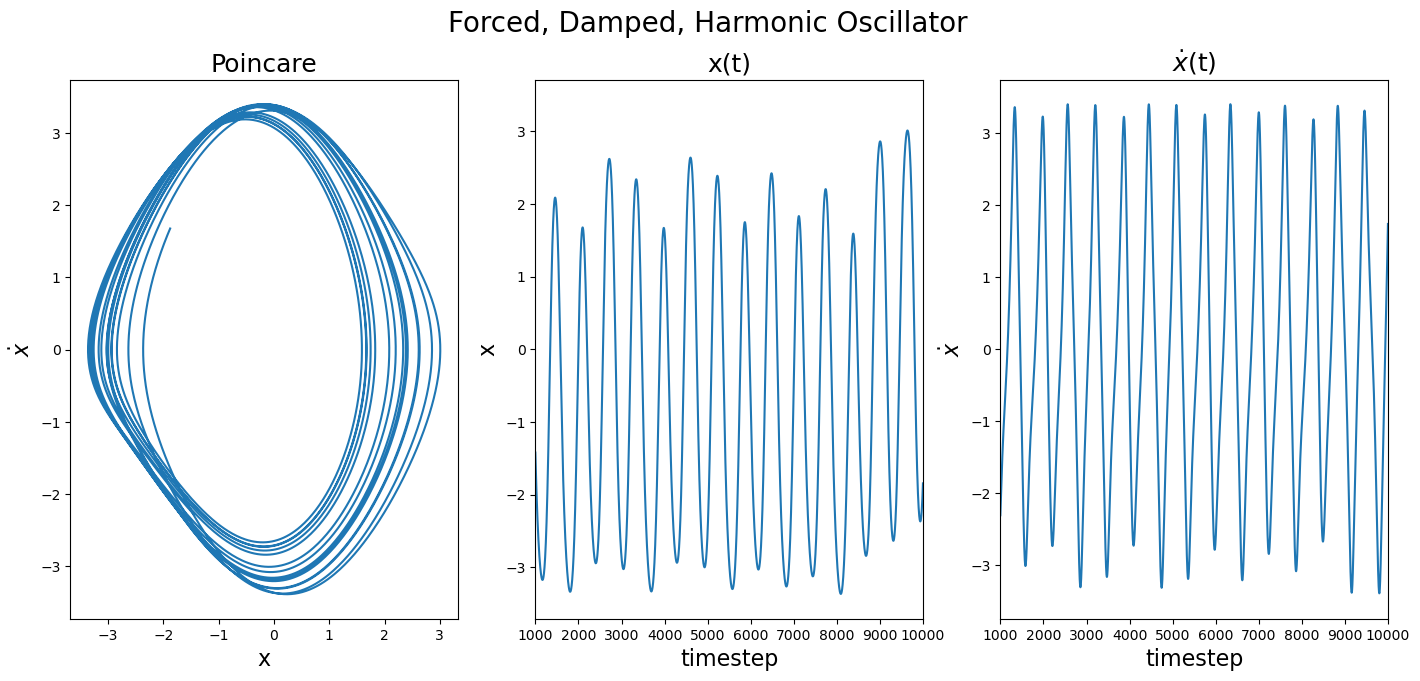

In [27]:
%matplotlib inline

# Let's check that we've got chaos
fig, axs = plt.subplots(1,3, figsize=(17,7))

x = Y[:,0]
xdot = Y[:,1]

t0=1000
t1=10000

axs[0].plot(x[t0:t1],xdot[t0:t1])
axs[0].set_xlabel('x', fontsize=16)
axs[0].set_ylabel(r'$\dot{x}$', fontsize=16)
axs[0].set_title('Poincare', fontsize=18)

axs[1].plot(x)
axs[1].set_xlim(t0,t1)
axs[1].set_xlabel('timestep', fontsize=16)
axs[1].set_ylabel('x', fontsize=16)
axs[1].set_title('x(t)', fontsize=18)

axs[2].plot(xdot)
axs[2].set_xlim(t0,t1)
axs[2].set_xlabel('timestep', fontsize=16)
axs[2].set_ylabel(r'$\dot{x}$', fontsize=16)
axs[2].set_title(r'$\dot{x}$(t)', fontsize=18)

plt.suptitle('Forced, Damped, Harmonic Oscillator', fontsize=20)

In [28]:
# let's compare distance between two different initial conditions as a sort of chaos test
y0 = [2,-0.500001,0]

Y2 = scipy.integrate.odeint(derivatives, y0=y0, t=t, tfirst=True)

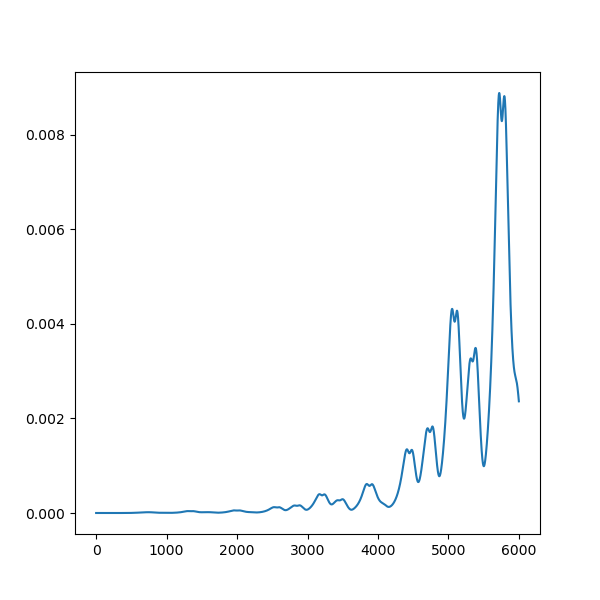

In [39]:
plt.figure(figsize=(6,6))

dist = np.sqrt((Y2[:,0] - Y[:,0])**2 + (Y2[:,1] - Y[:,1])**2)

plt.plot(dist[:6000])

Text(0.5, 1.0, '$\\dot{x}$')

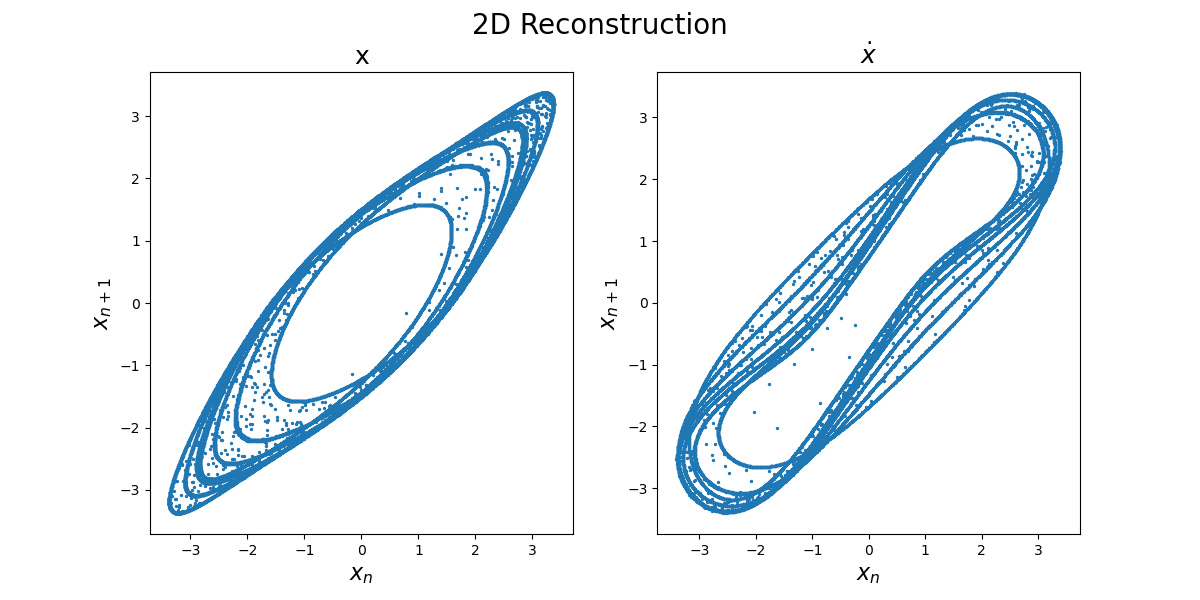

In [44]:
tau = 50
n=2

sampleX = reconstructPhase(Y[:,0], tau, 2)
sampleXdot = reconstructPhase(Y[:,1], tau, 2)

fig, axs = plt.subplots(1,2, figsize=(12,6))

axs[0].scatter(sampleX[0], sampleX[1], s=2)
axs[1].scatter(sampleXdot[0], sampleXdot[1], s=2)

plt.suptitle('2D Reconstruction', fontsize=20)

axs[0].set_xlabel(r'$x_n$', fontsize=16)
axs[0].set_ylabel(r'$x_{n+1}$', fontsize=16)
axs[0].set_title('x', fontsize=18)

axs[1].set_xlabel(r'$x_n$', fontsize=16)
axs[1].set_ylabel(r'$x_{n+1}$', fontsize=16)
axs[1].set_title(r'$\dot{x}$', fontsize=18)

Text(0.5, 0.92, '3D Reconstruction')

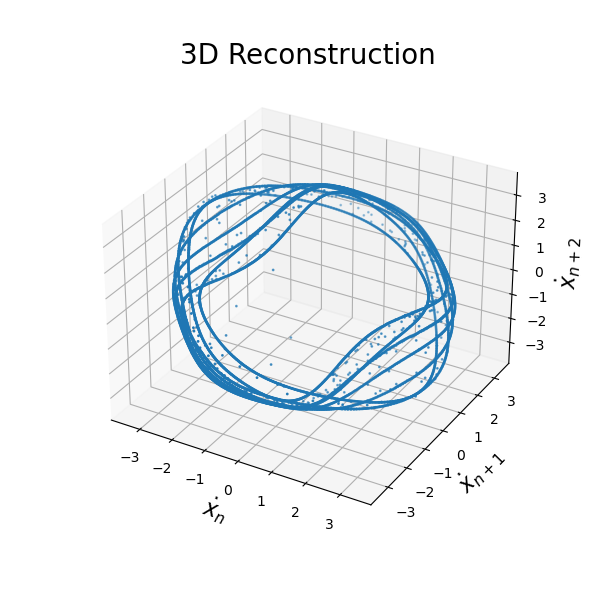

In [45]:
%matplotlib widget

tau = 100
n = 3
xdot = True

sampleX = reconstructPhase(Y[:,0], tau, 3)
sampleXdot = reconstructPhase(Y[:,1], tau, 3)

data = sampleX
if xdot: data=sampleXdot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[0], data[1], data[2], s=1)

ax.set_xlabel(r'$x_n$', fontsize=16)
ax.set_ylabel(r'$x_{n+1}$', fontsize=16)
ax.set_zlabel(r'$x_{n+2}$', fontsize=16)

if xdot:
    ax.set_xlabel(r'$\dot{x}_n$', fontsize=16)
    ax.set_ylabel(r'$\dot{x}_{n+1}$', fontsize=16)
    ax.set_zlabel(r'$\dot{x}_{n+2}$', fontsize=16)

ax.set_title('3D Reconstruction', fontsize=20)

In [46]:
len(data[0])

9997